In [90]:
import sqlite3

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#create sqlite database
conn = sqlite3.connect("banking.db")#new database file banking.db
cursor=conn.cursor()#cursor used to run spl commands

In [93]:
cursor.execute("DROP TABLE IF EXISTS Transactions")
cursor.execute("""CREATE TABLE IF NOT EXISTS Transactions(transaction_id INTEGER PRIMARY KEY, account_id INTEGER, transaction_type TEXT,
amount REAL,date TIMESTAMP)""")

In [94]:
#INSERT DATA

sample_data = [(101,"Deposit",5000,"2025-08-01 10:00:00"),
              (101,"Withdrawl",2000,"2025-08-01 11:00:00"),
              (102,"Deposit",100000,"2025-08-02 09:00:00"),
              (103,"Withdrawl",70000,"2025-08-02 10:30:00"),
             (103,"Deposit",1500,"2025-08-02 12:00:00"),
              (104,"Withdrawl",80000,"2025-08-03 14:00:00")]
cursor.executemany("""INSERT INTO Transactions (account_id,transaction_type,amount,date)VALUES(?,?,?,?)""",sample_data)
conn.commit()#save changes permanently
df = pd.read_sql_query("select*from Transactions",conn)
print(df)

   transaction_id  account_id transaction_type    amount                 date
0               1         101          Deposit    5000.0  2025-08-01 10:00:00
1               2         101        Withdrawl    2000.0  2025-08-01 11:00:00
2               3         102          Deposit  100000.0  2025-08-02 09:00:00
3               4         103        Withdrawl   70000.0  2025-08-02 10:30:00
4               5         103          Deposit    1500.0  2025-08-02 12:00:00
5               6         104        Withdrawl   80000.0  2025-08-03 14:00:00


In [95]:
#fraud detection rule
#rule 1: large transaction (>50,000)

large_txn = df[df['amount']>50000]
print("\n LARGE TRANSACTION : \n",large_txn)

 #rule 2: Multiple withdrawls from same account(>1)
withdrawls = df[df["transaction_type"] == "Withdrawl"]
suspicious_withdrawls = withdrawls.groupby("account_id").filter(lambda x: len(x)>1)
print("\n MULTIPLE WITHDRWALS : \n",suspicious_withdrawls )

#rule 3: sudden high deposits after withdrwals
# df["time_diff"] = df.groupby("account_id")["date"].diff().dt.total_seconds/60
# rapid_txn = df[df["time_diff"]<10]
# print(rapid_txn)


 LARGE TRANSACTION : 
    transaction_id  account_id transaction_type    amount                 date
2               3         102          Deposit  100000.0  2025-08-02 09:00:00
3               4         103        Withdrawl   70000.0  2025-08-02 10:30:00
5               6         104        Withdrawl   80000.0  2025-08-03 14:00:00

 MULTIPLE WITHDRWALS : 
 Empty DataFrame
Columns: [transaction_id, account_id, transaction_type, amount, date]
Index: []


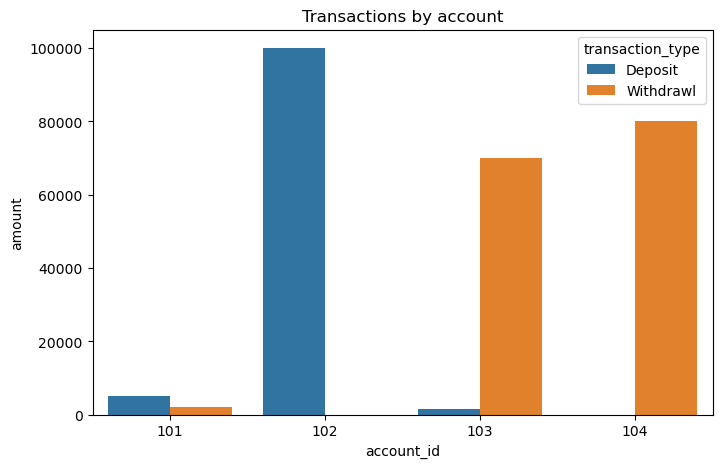

In [96]:
#Visualisation
plt.figure(figsize=(8,5))
sns.barplot(x= "account_id" , y ="amount" , hue="transaction_type", data=df)
plt.title("Transactions by account")
plt.show()